<a href="https://colab.research.google.com/github/Abhijeet-Real/AI_Profane_Sentence_Generator/blob/main/Profane_Sentence_Generator_v_4_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Inforamtion


1.   Logo
2.   Description
3.   How to run



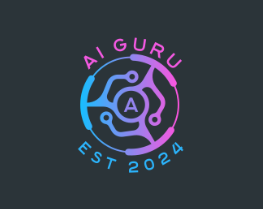

This program utilizes a matrix-based approach to generate profane sentences effortlessly. By structuring the input matrix appropriately, you can create a template that forms the basis of profane sentence generation. Each row of the matrix represents a sentence or a partial sentence, with each element contributing to the construction of the final profane sentences.

Key features of the program include:

* Profanity Marking: You can mark specific columns in the matrix to indicate which words contribute to the profanity of the generated sentences.

* Automatic Processing: The program automatically handles tasks such as removing leading and trailing blanks from the matrix, transposing it for efficient processing, and cleaning out any redundant or empty elements.

* Sentence Generation: It generates a vast number of profane sentences by combining the elements of the matrix according to the template provided.

* Profane Word Storage: For each profane sentence generated, the program stores the corresponding profane words along with it. These are organized and saved in an Excel file for easy access and management.

By leveraging this matrix-based approach, you can create a diverse range of profane sentences with minimal effort. The program streamlines the process, allowing you to focus on crafting the matrix template and leaving the sentence generation to the code.



1.   Run Class Section Cell
2.   Run Driver Section Cell

*     Use Example Data Sheet or
*     Create your own template Sheet






# Class


In [4]:
import regex as re
import random
import pandas as pd

# Class for generating profane sentences
class ProfaneSentenceGenerator:

    # Constructor
    def __init__(self, matrix, profaneColumns):
        # Stores the matrix of words, each row containing a sentence or partial sentence
        self.matrix = matrix
        # Removes all leading and trailing blanks from the matrix
        self.matrix = self.removeBlank()
        # Transposes the matrix
        self.matrix = self.transposeMatrix()
        # Cleans the matrix of useless empty elements
        self.matrix = self.cleanMatrix()
        # Stores profane columns after transposing the matrix, it stores rows
        self.profaneColumns = profaneColumns
        # Stores generated profane sentences
        self.listProfaneSentence = []
        # Stores corresponding profane words for each profane sentence
        self.listProfaneWord = []

    #Method to read data from excel file
    def readExcelData(self, filename):
      # Read the Excel file
      df = pd.read_excel(filename, header=None)

      # Initialize variables
      raw_data = []
      matrix = []
      profane_columns = None
      is_matrix = False

      # Iterate over each row in the dataframe
      for index, row in df.iterrows():
        if not is_matrix:
            # Check if 'matrix' is found in the first cell
            if 'matrix' in str(row[0]).lower():
                is_matrix = True
                matrix = []
                profane_columns = None

                matrix_row = [cell if not pd.isnull(cell) else '' for cell in row]
                matrix_row.pop(0)
                matrix.append(matrix_row)
        else:
            # Check if the row contains 'profaneColumns'
            #if yes it is profane column and end of object so append all data in dictionary
            #if no it is part of matrix
            if 'profanecolumns' in str(row[0]).lower():
                profane_columns = [int(cell) for cell in row[1:] if not pd.isnull(cell)]
                raw_data.append({'matrix': matrix, 'profaneColumns': profane_columns})
                is_matrix = False
            else:
                # Extract matrix row
                matrix_row = [cell if not pd.isnull(cell) else '' for cell in row]
                #pop 1st column of row unwanted
                matrix_row.pop(0)
                matrix.append(matrix_row)

      return raw_data

    # Method to remove leading and trailing blanks from the matrix
    def removeBlank(self):
        if self.matrix == []:
            return []
        for i in range(len(self.matrix)):
            for j in range(len(self.matrix[i])):
                self.matrix[i][j] = self.matrix[i][j].strip()
        return self.matrix

    # Method to transpose the matrix
    def transposeMatrix(self):
        if self.matrix == []:
            return []
        return [[row[i] for row in self.matrix] for i in range(len(self.matrix[0]))]

    # Method to clean the matrix of useless empty elements
    def cleanMatrix(self):
        if self.matrix == []:
            return []
        cleanedMatrix = []
        for row in self.matrix:
            cleanedRow = [element for element in row if not re.match('^$', element)]
            if cleanedRow != []:
                cleanedMatrix.append(cleanedRow)
        return cleanedMatrix

    # Method to multiply each row with the profane sentences
    def multiplyRow(self, row):
        listProfaneSentence2 = []
        for i in self.listProfaneSentence:
            for j in row:
                listProfaneSentence2.append(i + " " + j)
        return listProfaneSentence2

    # Method to generate profane words
    def profaneWord(self, row, word=0):
        listProfaneWord2 = []
        if word == 0:
            for i in self.listProfaneWord:
                for j in row:
                    listProfaneWord2.append(i)
        if word == 1:
            for i in self.listProfaneWord:
                for j in row:
                    if i == "":
                        listProfaneWord2.append(j)
                    else:
                        listProfaneWord2.append(i + ", " + j)
        return listProfaneWord2

    # Method to generate profane sentences
    def generator(self):
        self.listProfaneSentence = self.matrix[0]
        self.listProfaneWord = ["" for i in range(len(self.listProfaneSentence))]
        if self.profaneColumns[0] == 1:
            self.listProfaneWord = self.matrix[0]
        for row in range(len(self.matrix) - 1):
            self.listProfaneSentence = self.multiplyRow(self.matrix[row+1])
            self.listProfaneWord = self.profaneWord(self.matrix[row+1], self.profaneColumns[row + 1])
        return self.listProfaneSentence, self.listProfaneWord

    # Method to merge lists from another object
    def mergeLists(self, otherObject):
        self.listProfaneSentence += otherObject.listProfaneSentence
        self.listProfaneWord += otherObject.listProfaneWord

    # Method to shuffle the lists
    def shuffleList(self):
        zippedLists = list(zip(self.listProfaneWord, self.listProfaneSentence))
        random.shuffle(zippedLists)
        self.listProfaneWord, self.listProfaneSentence = zip(*zippedLists)

    # Method to save the generated profane sentences to an Excel file
    def saveToExcel(self, filename = "untitled.xlsx"):
        data = {"Profane Words": self.listProfaneWord, "Sentence": self.listProfaneSentence}
        df = pd.DataFrame(data)
        df.to_excel(filename, index=False)

#End of class

# Object Data

In [ ]:
# Example raw data for object of above class
rawData = [
    {  'matrix' : [
            ['I want', 'to', 'slang1', 'of my daughter ', 'in law.', 'How to ', 'do that?'],
            ['I will like', ' ', 'slang2', 'of my mother', '', '', ' '],
        ],
        'profaneColumns' : [0 ,0 ,1 ,0 ,0 ,0 ,0],
    },
    {   'matrix' : [
            ['My daughter', 'like to', 'play with ', 'red ball.', 'Slang3,', 'from where to ', ' buy that? '],
            ['My son', 'loves to ', '', 'green mouse', 'Slang4', '', ' '],
        ],
        'profaneColumns' : [0 ,0 ,0 ,0 ,1 ,0 ,0],
      }
]

#intialzing all raw data in form of object stored in list
objectList = []
for objData in rawData:
    matrix = objData['matrix']
    profaneColumns = objData['profaneColumns']
    obj = ProfaneSentenceGenerator(matrix, profaneColumns)
    objectList.append(obj)

# Driver Function

In [5]:
#Drives the code
def driver(rawDataFile, outputFilename):
  mainObject = ProfaneSentenceGenerator([], [])
  rawData = mainObject.readExcelData(rawDataFile)
  #intialzing all raw data in form of object stored in excel
  objectList = []
  for objData in rawData:
    matrix = objData['matrix']
    profaneColumns = objData['profaneColumns']
    obj = ProfaneSentenceGenerator(matrix, profaneColumns)
    objectList.append(obj)
  #genrating Sentences
  for obj in objectList:
    obj.generator()
  #merging all Sentences in one list
  for obj in objectList:
    mainObject.mergeLists(obj)
  mainObject.shuffleList()
  mainObject.saveToExcel(outputFilename)
#End of function
#Make a call
driver('English_Template_00.xlsx', "EnglishProanityExample.xlsx")

# GitHub